[Title(TBD)]

Abdulla Almahmood()  
Max Gunton()  
Yaxi Yu(V00828218)


In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('Structured Data/epi_r_reduced.csv', low_memory=False)
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


as we can see, the 1st column stores the name of each recipe; the column 2 to 6 store the generational info of each recipe; and the rest store the ingredients respectively.  
We want to visualize the 2nd to the 6th column, to see if there's any relationship we can find.  

In [9]:
data_general_info = data[['rating', 'calories', 'protein', 'fat', 'sodium']]
data_general_info.head()

,rating,calories,protein,fat,sodium
0,2.500,426.0,30.0,7.0,559.0
1,4.375,403.0,18.0,23.0,1439.0
2,3.750,165.0,6.0,7.0,165.0
3,5.000,NaN,NaN,NaN,NaN
4,3.125,547.0,20.0,32.0,452.0


Then, construct a method to normalize the data

In [10]:
def normalize(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

Call this method to normalze these columns

In [11]:
data_general_info_normalized = data_general_info.apply(normalize)
data_general_info_normalized.head()

,rating,calories,protein,fat,sodium
0,0.500,0.346510,0.326087,0.080460,0.311074
1,0.875,0.327166,0.195652,0.264368,0.800779
2,0.750,0.126997,0.065217,0.080460,0.091820
3,1.000,NaN,NaN,NaN,NaN
4,0.625,0.448276,0.217391,0.367816,0.251530


We can use seaborn to make the plot

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(data = data_general_info_normalized)
plt.show()

<Figure size 640x480 with 1 Axes>

Use Violin Plot to visualise the distribution of the data and its probability density.

In [13]:
# data_r_p_f = data_general_info.drop(['calories', 'sodium'], axis=1)
# sns.boxplot(data=data_r_p_f)
# plt.show()

C:\Users\OVRS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


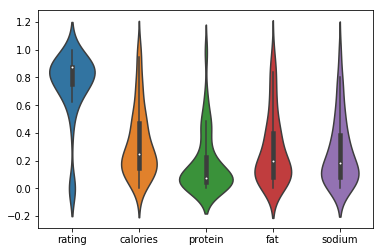

In [14]:
sns.violinplot(data=data_general_info_normalized)

plt.show()

Below takes in the predictions as an array and the correct classifications and uses the two to return the confidence interval

In [15]:
# confidenceInterval.py

import numpy as np
from math import sqrt

# TODO: expand evaluator to handle continuous class labels

# class_labels must be discrete and not continuous and numerical

class confidenceInterval:
    CLT_PROB_DIST = {0.1 : 3.09,    # 99.8% confidence
                 0.5 : 2.58,     # 99%     "
                 1.0 : 2.33,    # 98%      "
                 5.0 : 1.65,    # 90%      "
                 10.0 : 1.28,   # 80%      "
                 20.0 : 0.84,   # 60%      "
                 40.0 : 0.25}   # 20%      "
    MAX_SPREAD = 100
    p = None
    q = None
    variance = None
    SN = None
    N = None
    confidence = None
    
    
    def __init__(self, predictions=None, class_labels=None):
        pass

    def quantizeConfidence(self, confidence):
        index = (100 - confidence)/2.0
        values = np.array([0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 40.0])
        diffs = abs(values - index)
        index = values[np.argmin(diffs)]
        return (100 - (2*index)) , index

    
    def establish(self, predictions, class_labels, confidence=90):
        
        assert (len(predictions) == len(class_labels))

        self.confidence, index = self.quantizeConfidence(confidence)
        self.N = len(predictions)

        # ensure that the input arrays are of type numpy.array
        predictions = np.array(predictions)     # predictions.shape = (N,)
        class_labels = np.array(class_labels)   # class_labels.shape = (N,)

        # check to make sure they are the same shape
        assert (predictions.shape == class_labels.shape)

        # compare each array element wise to see if they are the same
        # given multiple class values if they are represented using integers
        # the predictions can be subtracted from the actual class_labels and
        # resulting zeros will indicate a successful predictions; anything else will
        # indicate an error or incorrect prediction

        results = class_labels - predictions
        #print(results)  # prints correctly
        #print(self.N)  # prints 32
        
        self.p = float(len([result for result in results if result == 0]))/float(self.N)
        self.q = 1-self.p
        self.variance = self.p*self.q/self.N
        denom = sqrt(self.variance)

        self.SN = [(self.p - self.CLT_PROB_DIST[index]*denom),
                   (self.p + self.CLT_PROB_DIST[index]*denom)]

        return
        
   
    def printConfidence(self):
        if self.SN != None:
            # \U+03F5 unicode for within the set
            print('Successes: {}\nErrors: {}\n___________\nTotal Instances: {}\n\nP: {}\nQ: {}\nVariance:'
                  ' {}\n'.format(self.p*self.N, self.q*self.N, self.N, self.p, self.q, self.variance))
            print('With {}% confidence probability of correct classification is in the '
                  'range {:.1f}% - {:.1f}%\n\n'.format(self.confidence,self.SN[0]*100,
                                                   self.SN[1]*100))
        else:
            print('Confidence not yet established\n\n')
        return

Below is an implementation of a cross validator.  Will add a more in depth description about this

In [16]:
# crossValidator.py

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
#from confidenceInterval import confidenceInterval

# Linear Classifiers
from sklearn.linear_model import LogisticRegression, LinearRegression

# Decision Tree Classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

CLASS_LABEL = 'rating'
NUM_CLASSES = 6
NUM_SPLITS = 10

df = pd.read_csv('Structured Data/epi_r.csv')  # read in entire dataset
df.fillna(-1, inplace=True)    # replace NaN values with -1

# split data into attributes and class labels
y = df[CLASS_LABEL]
X = df[[col for col in df.columns if col != CLASS_LABEL]]

# convert y to a numpy array
y = np.array(y)
y.reshape((-1,))

# change y from being continuous values between 0-5 to simply being an integer number
# 0, 1, 2, 3, 4, or 5
y = pd.cut(y,NUM_CLASSES, right=False, labels=[i for i in range(NUM_CLASSES)])

# print(y)
# print(X.columns[1])
strat_k_fold = StratifiedKFold(n_splits=NUM_SPLITS)  # parameters n_folds=10, shuffle=False, random_state=None

# Here we want to cast X and y as numpy arrays
X = np.array(X)
y = np.array(y)

# want to find the class that occurs the least often and only take that many instances
# from each class value so that we end up with an even distribution
minimum = np.min([len([val for val in y if val == i]) for i in range(6)])

classes = np.array([],dtype=np.int32).reshape(-1,)
for i in range(NUM_CLASSES):
    classes = np.append(classes,np.array((np.where(y == i)),dtype=np.int32).reshape(-1,)[:minimum])

X = X[classes] # extract our subset from entire dataset
y = y[classes] #              "

X = X[:, 1:]  # remove the title column from the dataset since these are unique to each entry anyway

splits = strat_k_fold.split(X, y)
#scores = np.array([], dtype=np.float32).reshape(-1,)
for train_index, test_index in splits:
    # print('Train Index: {}'.format(train_index))
    # print('Test Index: {}'.format(test_index))
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    # TODO: use a grid search to determine the best learning constant
    #       tweek C and max iterations to get good convergence and speed mix
    log_reg_m = LogisticRegression(solver='lbfgs', C=0.1, max_iter=50000, multi_class='multinomial') #max_iter=50000
    lin_reg_m = LinearRegression()
    dtr_m = DecisionTreeRegressor()
    rfr_m = RandomForestRegressor(n_estimators=100)

    log_reg_m.fit(X_train, y_train)
    lin_reg_m.fit(X_train, y_train)
    dtr_m.fit(X_train, y_train)
    rfr_m.fit(X_train, y_train)


    # print(log_reg_m.score(X_train,y_train))  # validating on test data

    y1 = log_reg_m.predict(X_test) # this one works well not to sure about the others
    y2 = lin_reg_m.predict(X_test)
    y3 = dtr_m.predict(X_test)
    y4 = rfr_m.predict(X_test)

    # try taking an average and choosing the closest
    prediction = (y1 + y2 + y3 + y4) / 4
    prediction = np.around(prediction)
    c1 = confidenceInterval()
    c1.establish(prediction, y_test, 80) # want to know with 80% confidence
    c1.printConfidence()

    # TODO: try voting based on majority
    # prediction = np.column_stack((y1,y2,y3,y4))

#print(scores.sum()/strat_k_fold.n_splits)




Successes: 22.0
Errors: 56.0
___________
Total Instances: 78

P: 0.28205128205128205
Q: 0.717948717948718
Variance: 0.0025961327736475667

With 80.0% confidence probability of correct classification is in the range 21.7% - 34.7%
Successes: 14.0
Errors: 64.0
___________
Total Instances: 78

P: 0.1794871794871795
Q: 0.8205128205128205
Variance: 0.0018880965626527756

With 80.0% confidence probability of correct classification is in the range 12.4% - 23.5%
Successes: 20.0
Errors: 58.0
___________
Total Instances: 78

P: 0.2564102564102564
Q: 0.7435897435897436
Variance: 0.002444410728434397

With 80.0% confidence probability of correct classification is in the range 19.3% - 32.0%
Successes: 20.0
Errors: 58.0
___________
Total Instances: 78

P: 0.2564102564102564
Q: 0.7435897435897436
Variance: 0.002444410728434397

With 80.0% confidence probability of correct classification is in the range 19.3% - 32.0%
Successes: 27.0
Errors: 45.0
___________
Total Instances: 72

P: 0.375
Q: 0.625
Varian